In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
plt.rcParams["font.family"] = "Arial"

#Loading Data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter for the jon titles and country
df_us= df[df['job_country']=='United States'].dropna(subset='salary_year_avg')

In [3]:
job_titles= df_us['job_title_short'].value_counts().index[:6].to_list()

In [4]:
df_us_top6= df_us[df_us['job_title_short'].isin(job_titles)]

In [5]:
job_order=df_us_top6.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False).index

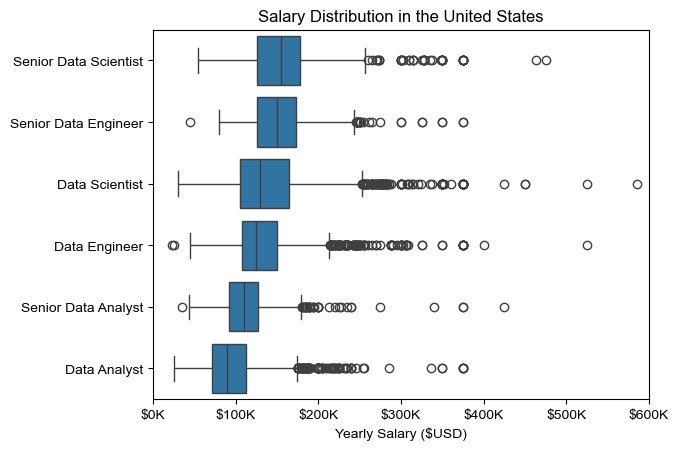

In [6]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))
plt.show()

In [7]:
df_da_us= df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')].copy()

In [8]:
df_da_us= df_da_us.dropna(subset='salary_year_avg')

In [9]:
df_da_us= df_da_us.explode('job_skills')

In [10]:
df_da_top_pay= df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_da_top_pay= df_da_top_pay.head(10)

In [11]:
df_da_skills= df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_skills= df_da_skills.head(10).sort_values(by='median', ascending=False)

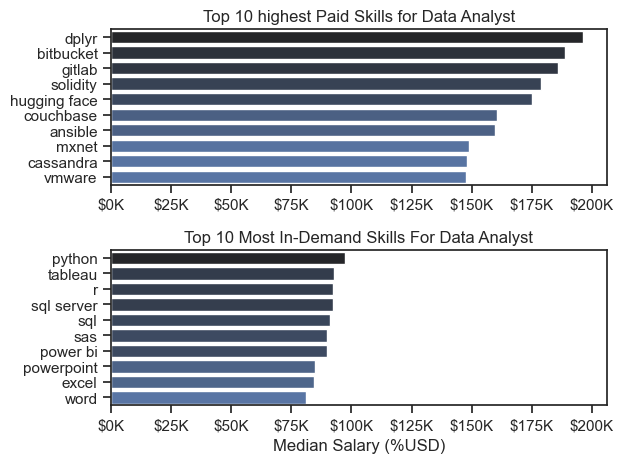

In [13]:
fig, ax= plt.subplots(2,1)
sns.set_theme(style='ticks')

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].set_title('Top 10 highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${x/1000:1.0f}K'))
ax[0].legend().remove()

sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='dark:b_r')
ax[1].set_title('Top 10 Most In-Demand Skills For Data Analyst')
ax[1].set_xlabel('Median Salary (%USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${x/1000:1.0f}K'))
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()